# Project 5: Communicate Data Findings : 2020 US Domestic Flights Dataset 

> The 2020 US Domestic Flights datset contains 607346 rows and 22 features.
>
> **Feature Description :**
    > - **YEAR** 
    > - **MONTH**
    > - **DAY_OF_MONTH** 
    > - **DAY_OF_WEEK**: 1: Monday 2: Tuesday 3: Wednesday 4: Thursday 5: Friday 6: Saturday 7:Sunday 9: Unknown
    > - **FL_DATE**: Flight Date (yymmdd)
    > - **ORIGIN** : Origin Airport
    > - **ORIGIN_CITY_NAME**: Origin Airport, City Name
    > - **ORIGIN_STATE_NM**: Origin Airport, State Name
    > - **DEST**: Destination Airport
    > - **DEST_CITY_NAME**: Destination Airport, City Name
    > - **DEST_STATE_NM**: Destination Airport, State Name
    > - **DEP_TIME**: Actual Departure Time (local time: hhmm)
    > - **DEP_DELAY**: Difference between scheduled and actual departure time. Early departures show negative numbers (minutes).
    > - **DEP_DEL15**: Departure Delay Indicator, 15 Minutes or More (1=Yes; 0=NO)
    > - **ARR_TIME**: Actual Arrival Time (local time: hhmm)
    > - **ARR_DELAY**: Difference between scheduled and actual arrival time. Early arrivals show negative numbers (minutes).
    > - **ARR_DEL15**: Arrival Delay Indicator, 15 Minutes or More (1=Yes; 0=No)
    > - **CANCELLED**: Cancelled Flight Indicator (1=Yes; 0=NO)
    > - **AIR_TIME**: Flight Time (minutes)
    > - **DISTANCE**: Distance between airports (miles)
    > - **Code** :  Unique Carrier Code. When the same code has been used by multiple carriers, a numeric suffix is used for earlier users, for example, PA, PA(1), PA(2). Use this field for analysis across a range of years.
    > - **Description** : Description of the Carrier
## Preliminary Wrangling

The 2020 US Domestic Flights datset contains 
This document explores the datset containing time, location, and delay status of 607346 flights of 2020 January US flights. 

In [130]:
#Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [131]:
#Load flights dataset
flights = pd.read_csv('flights.csv')
flights.head()

,YEAR,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,OP_UNIQUE_CARRIER,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_NM,DEST,...,DEP_TIME,DEP_DELAY,DEP_DEL15,ARR_TIME,ARR_DELAY,ARR_DEL15,CANCELLED,AIR_TIME,DISTANCE,Unnamed: 21
0,2020,1,1,3,2020-01-01,WN,ONT,"Ontario, CA",California,SFO,...,1851.0,41.0,1.0,2053.0,68.0,1.0,0.0,74.0,363.0,NaN
1,2020,1,1,3,2020-01-01,WN,ONT,"Ontario, CA",California,SFO,...,1146.0,-4.0,0.0,1318.0,-2.0,0.0,0.0,71.0,363.0,NaN
2,2020,1,1,3,2020-01-01,WN,ONT,"Ontario, CA",California,SJC,...,2016.0,-4.0,0.0,2124.0,-6.0,0.0,0.0,57.0,333.0,NaN
3,2020,1,1,3,2020-01-01,WN,ONT,"Ontario, CA",California,SJC,...,1350.0,10.0,0.0,1505.0,10.0,0.0,0.0,63.0,333.0,NaN
4,2020,1,1,3,2020-01-01,WN,ONT,"Ontario, CA",California,SJC,...,916.0,1.0,0.0,1023.0,-12.0,0.0,0.0,57.0,333.0,NaN


In [132]:
#Load carriers dataset
carriers = pd.read_csv('L_UNIQUE_CARRIERS.csv')
carriers.head()

,Code,Description
0,02Q,Titan Airways
1,04Q,Tradewind Aviation
2,05Q,"Comlux Aviation, AG"
3,06Q,Master Top Linhas Aereas Ltd.
4,07Q,Flair Airlines Ltd.


In [133]:
#Drop unnecessary columns and merge flights and carriers dataset
flights.drop(['Unnamed: 21'], axis = 1, inplace = True)
flights = pd.merge(flights, carriers, left_on = 'OP_UNIQUE_CARRIER', right_on = 'Code', how = "left")
flights.drop(['OP_UNIQUE_CARRIER'], axis = 1, inplace = True)

#print(flights.dtypes)
flights.head()

,YEAR,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_NM,DEST,DEST_CITY_NAME,...,DEP_DELAY,DEP_DEL15,ARR_TIME,ARR_DELAY,ARR_DEL15,CANCELLED,AIR_TIME,DISTANCE,Code,Description
0,2020,1,1,3,2020-01-01,ONT,"Ontario, CA",California,SFO,"San Francisco, CA",...,41.0,1.0,2053.0,68.0,1.0,0.0,74.0,363.0,WN,Southwest Airlines Co.
1,2020,1,1,3,2020-01-01,ONT,"Ontario, CA",California,SFO,"San Francisco, CA",...,-4.0,0.0,1318.0,-2.0,0.0,0.0,71.0,363.0,WN,Southwest Airlines Co.
2,2020,1,1,3,2020-01-01,ONT,"Ontario, CA",California,SJC,"San Jose, CA",...,-4.0,0.0,2124.0,-6.0,0.0,0.0,57.0,333.0,WN,Southwest Airlines Co.
3,2020,1,1,3,2020-01-01,ONT,"Ontario, CA",California,SJC,"San Jose, CA",...,10.0,0.0,1505.0,10.0,0.0,0.0,63.0,333.0,WN,Southwest Airlines Co.
4,2020,1,1,3,2020-01-01,ONT,"Ontario, CA",California,SJC,"San Jose, CA",...,1.0,0.0,1023.0,-12.0,0.0,0.0,57.0,333.0,WN,Southwest Airlines Co.


In [134]:
#Change the datatype of variables 
col = ['DAY_OF_MONTH', 'DEP_DEL15','ARR_DEL15','CANCELLED']
flights[col] = flights[col].astype('object')

flights['FL_DATE'] = pd.to_datetime(flights['FL_DATE'])

col2 = ['DEP_TIME', 'ARR_TIME', 'DEP_DELAY', 'ARR_DELAY', 'AIR_TIME']
flights[col2] = flights[col2].round(0).astype('Int64')
flights.dtypes

YEAR                         int64
MONTH                        int64
DAY_OF_MONTH                object
DAY_OF_WEEK                  int64
FL_DATE             datetime64[ns]
ORIGIN                      object
ORIGIN_CITY_NAME            object
ORIGIN_STATE_NM             object
DEST                        object
DEST_CITY_NAME              object
DEST_STATE_NM               object
DEP_TIME                     Int64
DEP_DELAY                    Int64
DEP_DEL15                   object
ARR_TIME                     Int64
ARR_DELAY                    Int64
ARR_DEL15                   object
CANCELLED                   object
AIR_TIME                     Int64
DISTANCE                   float64
Code                        object
Description                 object
dtype: object

In [135]:
#Create DEP_HOUR and ARR_HOUR by extracting hour from DEP_TIME and ARR_TIME
flights.DEP_TIME[flights.DEP_TIME<100] = np.nan
flights['DEP_HOUR'] = ''
flights['DEP_HOUR'] = flights.DEP_TIME//100
flights['DEP_HOUR'] = flights.DEP_HOUR.mask(flights.DEP_HOUR==24, 0)
#flights['DEP_HOUR'] = flights.DEP_HOUR.astype('object')

flights.ARR_TIME[flights.ARR_TIME<100] = np.nan
flights['ARR_HOUR'] = ''
flights['ARR_HOUR'] = flights.ARR_TIME//100
flights['ARR_HOUR'] = flights.ARR_HOUR.mask(flights.DEP_HOUR==24, 0)
#flights['ARR_HOUR'] = flights.ARR_HOUR.astype('object')

In [136]:
#Create DEP_TIME_AM column
flights['DEP_TIME_AM'] = 'AM'
flights['DEP_TIME_AM'] = flights.DEP_TIME_AM.mask(flights.DEP_HOUR>11, 'PM')
flights['DEP_TIME_AM'] = flights['DEP_TIME_AM'].astype('category')
flights['DEP_TIME_AM'].cat.reorder_categories(['AM', 'PM'],inplace=True)

#Create ARR_TIME_AM column
flights['ARR_TIME_AM'] = 'AM'
flights['ARR_TIME_AM'] = flights.DEP_TIME_AM.mask(flights.DEP_HOUR>11, 'PM')
flights['ARR_TIME_AM'] = flights['ARR_TIME_AM'].astype('category')
flights['ARR_TIME_AM'].cat.reorder_categories(['AM', 'PM'],inplace=True)

#Create WEEKDAY_WEEKEND column
flights['WEEKDAY_WEEKEND'] = 'Weekday'
flights['WEEKDAY_WEEKEND'] = flights.WEEKDAY_WEEKEND.mask(flights.DAY_OF_WEEK>5, 'Weekend')
flights['WEEKDAY_WEEKEND'] = flights.WEEKDAY_WEEKEND.mask(flights.DAY_OF_WEEK==9).astype('category')
flights['WEEKDAY_WEEKEND']=flights['WEEKDAY_WEEKEND'].astype('category')
flights['WEEKDAY_WEEKEND'].cat.reorder_categories(['Weekday','Weekend'],inplace=True)

#Change DAY_OF_WEEK
flights['DAY_OF_WEEK'] = flights['DAY_OF_WEEK'].astype(str)
dayofweek = {'1':'Monday','2':'Tuesday','3':'Wednesday','4':'Thursday','5':'Friday','6':'Saturday','7':'Sunday'}
flights['DAY_OF_WEEK'].replace(dayofweek, inplace = True)
flights['DAY_OF_WEEK'] = flights['DAY_OF_WEEK'].astype('category')
flights['DAY_OF_WEEK'].cat.reorder_categories(['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'],inplace=True)

#Change 1=Yes, 0=No
flights[['DEP_DEL15','ARR_DEL15','CANCELLED']].astype(str)
flights[['DEP_DEL15','ARR_DEL15','CANCELLED']].replace({'1.0':'Yes','0.0':'NO'}, inplace=True)

flights=flights.mask(flights == '')
flights.head()

,YEAR,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_NM,DEST,DEST_CITY_NAME,...,CANCELLED,AIR_TIME,DISTANCE,Code,Description,DEP_HOUR,ARR_HOUR,DEP_TIME_AM,ARR_TIME_AM,WEEKDAY_WEEKEND
0,2020,1,1,Wednesday,2020-01-01,ONT,"Ontario, CA",California,SFO,"San Francisco, CA",...,0.0,74,363.0,WN,Southwest Airlines Co.,18,20,PM,PM,Weekday
1,2020,1,1,Wednesday,2020-01-01,ONT,"Ontario, CA",California,SFO,"San Francisco, CA",...,0.0,71,363.0,WN,Southwest Airlines Co.,11,13,AM,AM,Weekday
2,2020,1,1,Wednesday,2020-01-01,ONT,"Ontario, CA",California,SJC,"San Jose, CA",...,0.0,57,333.0,WN,Southwest Airlines Co.,20,21,PM,PM,Weekday
3,2020,1,1,Wednesday,2020-01-01,ONT,"Ontario, CA",California,SJC,"San Jose, CA",...,0.0,63,333.0,WN,Southwest Airlines Co.,13,15,PM,PM,Weekday
4,2020,1,1,Wednesday,2020-01-01,ONT,"Ontario, CA",California,SJC,"San Jose, CA",...,0.0,57,333.0,WN,Southwest Airlines Co.,9,10,AM,AM,Weekday


In [137]:
#Check data shape and data types
#print(flights.shape)
print(flights.isna().sum())

YEAR                    0
MONTH                   0
DAY_OF_MONTH            0
DAY_OF_WEEK             0
FL_DATE                 0
ORIGIN                  0
ORIGIN_CITY_NAME        0
ORIGIN_STATE_NM         0
DEST                    0
DEST_CITY_NAME          0
DEST_STATE_NM           0
DEP_TIME             8347
DEP_DELAY            6699
DEP_DEL15            6699
ARR_TIME            17457
ARR_DELAY            8078
ARR_DEL15            8078
CANCELLED               0
AIR_TIME             8078
DISTANCE                0
Code                    0
Description             0
DEP_HOUR                0
ARR_HOUR            17457
DEP_TIME_AM             0
ARR_TIME_AM             0
WEEKDAY_WEEKEND         0
dtype: int64


In [138]:
#Check descriptive statistics
print(flights.describe())

           YEAR     MONTH     DEP_TIME  DEP_DELAY     ARR_TIME  ARR_DELAY  \
count  607346.0  607346.0     598999.0   600647.0     589889.0   599268.0   
mean     2020.0       1.0  1335.173095   6.181221  1503.560083  -1.620799   
std         0.0       0.0   492.965136  43.181905   493.139362  45.015546   
min      2020.0       1.0        100.0      -58.0        100.0      -96.0   
25%      2020.0       1.0        921.0       -6.0       1111.0      -18.0   
50%      2020.0       1.0       1328.0       -3.0       1521.0      -10.0   
75%      2020.0       1.0       1740.0        2.0       1922.0        2.0   
max      2020.0       1.0       2400.0     2489.0       2400.0     2536.0   

         AIR_TIME       DISTANCE   DEP_HOUR   ARR_HOUR  
count    599268.0  607346.000000   607346.0   589889.0  
mean   112.187437     798.022341  12.863995  14.739032  
std     70.629553     587.282639   5.137119   4.933739  
min           8.0      31.000000        0.0        1.0  
25%          61.0    

## DATA EXPLORATION

### Univariate Exploration

> In this section, I investigate distributions of individual variables. I investigate which features are most related to flight delay and cancellation.

### Departure Delayed Flights

#### **DEP_DEL15** : Departure Delay Indicator, 15 Minutes or More

In [139]:
#Create function to plot pie charts of categorical features
def plot_pie(col):
    data = flights.groupby(flights[col]).size()

    plt.figure(figsize = (6,6))
    labels=['No', 'Yes']
    explode=(0,.1)
    colors = ['#ff9999','#66b3ff']
    textprops={'fontsize': 12}
    data.plot(kind='pie', autopct='%.2f%%', explode=explode, labels=labels, ylabel='', colors=colors, textprops=textprops, legend=True)
    plt.title("Pie Chart of "+col)
    

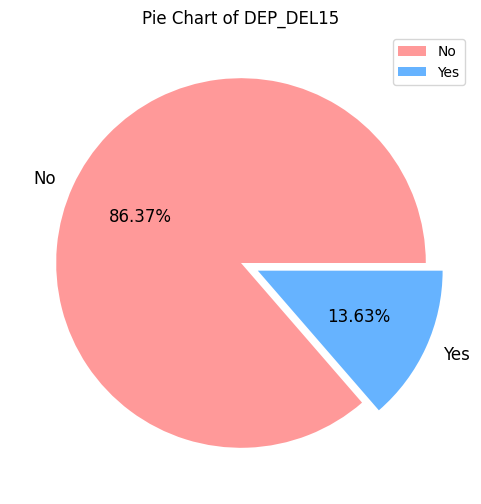

In [140]:
plot_pie('DEP_DEL15')

#### **DEP_DELAY** : Difference between scheduled and actual departure time

In [141]:
#Create function to plot histogram and boxplot of continuous features
def plot_distribution(col, step=5):
    
    #Filter NA values
    filtered_data = flights[~np.isnan(flights[col])]
    
    bin_edges = np.arange(filtered_data[col].min()- step, filtered_data[col].max()+step, step)
    x_min, x_max = filtered_data[col].quantile(0.01)- step, filtered_data[col].quantile(0.99)+step

    #Plot histogram
    plt.figure(figsize = [15,6])
    plt.subplot(2,1,1)
    plt.hist(filtered_data[col], bins=bin_edges)
    #Add delay indicator for DEP_DELAY and ARR_DELAY
    if col=="DEP_DELAY" or "ARR_DELAY":
        plt.axvline(15, color='k', linestyle='--')
    plt.xlim(x_min, x_max)
    plt.xticks(np.arange(x_min,x_max,step), fontsize=6)
    plt.title('Distribution of '+col)

    #Plot Boxplot
    plt.subplot(2,1,2)
    plt.boxplot(x=filtered_data[col], vert=False, showfliers=False)
    #Add delay indicator for DEP_DELAY and ARR_DELAY
    if col=="DEP_DELAY" or "ARR_DELAY":
        plt.axvline(15, color='k', linestyle='--')
    plt.xlim(x_min,x_max)
    plt.xticks(np.arange(x_min,x_max,step), fontsize=6)

    if col=="DISTANCE":
        plt.xlabel(col+"(miles)")  
    else:
        plt.xlabel(col+"(min)")


> 13.6% of all 2020 January flights were departure delayed for more than 15 minutes. Most planes departed in betweeen 20 minutes prior to and 20 minutes after actual departure time. The overall distribution is skewed to the right; there are planes that departed more than 60 minutes after the actual departure time. The maximum delayed departure is 2489 minutes (41.5 hours). 

### Arrival Delayed Flights

#### **ARR_DEL15** : Arrival Delay Indicator, 15 Minutes or More

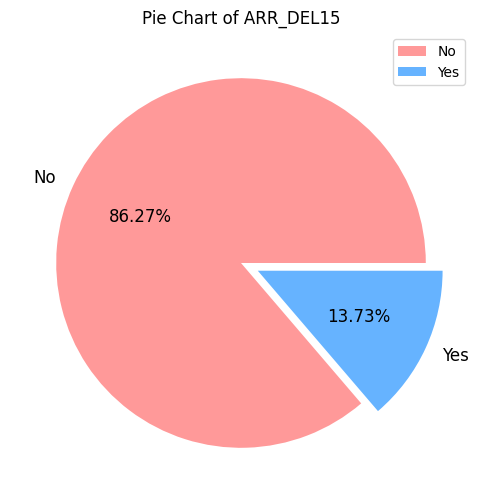

In [142]:
plot_pie('ARR_DEL15')

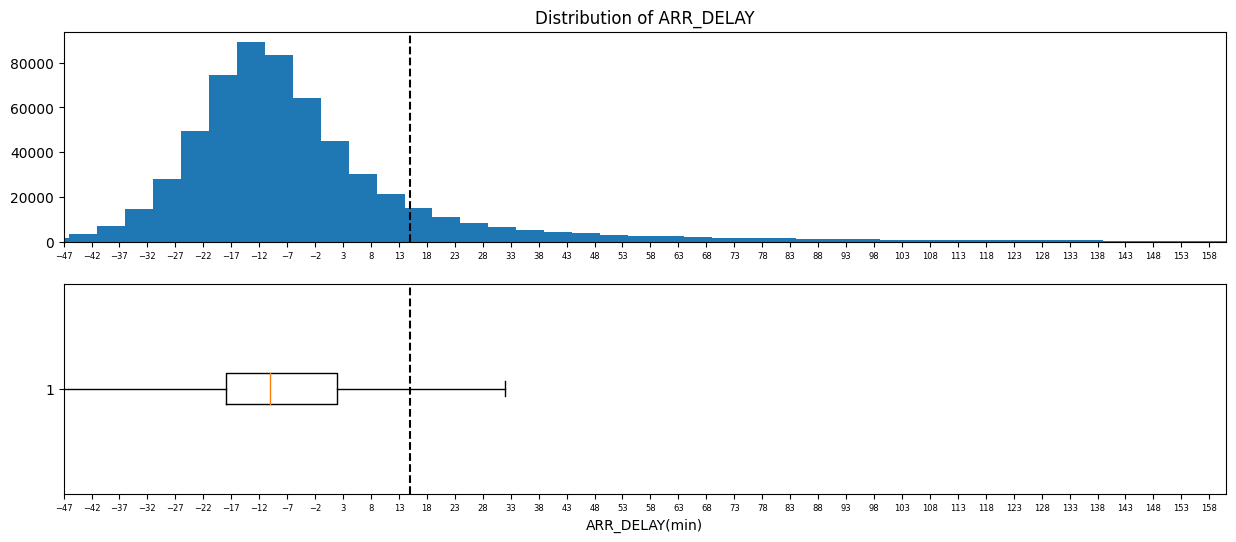

In [143]:
plot_distribution('ARR_DELAY')

> 13.7% of all 2020 January flights were arrival delayed for more than 15 minutes. Most planes arrived in betweeen 40 minutes prior to and 40 minutes after of actual departure time. The overall distribution is approximately normal; there are planes that arrive as early as 60 minutes prior to and 60 minutes after the actual arrival time. The maximum delayed arrival is 2536 minutes (42.3 hours). 


### Cancelled Flights

#### **CANCELLED** : Cancelled Flight Indicator (1=Yes; 0=NO)

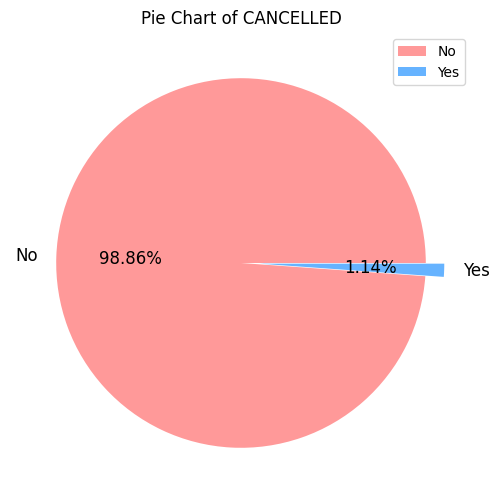

In [144]:
plot_pie('CANCELLED')

> 1.14% of all 2020 January flights were cancelled.

### Flight Air Time

#### **AIR_TIME** : Flight Time 

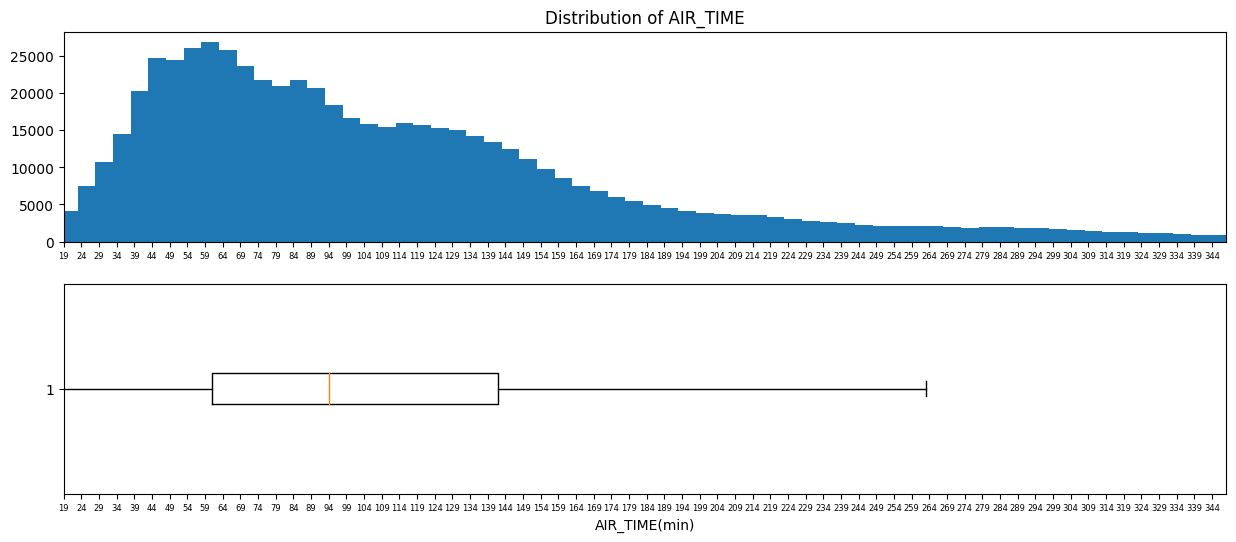

In [145]:
plot_distribution('AIR_TIME')

> Most flights have an air time between 30 minutes and 200 minutes. The distribution has a long right tail (outliers to the right). The maximum air time is 698 minutes. 

### Flight Distance
#### DISTANCE

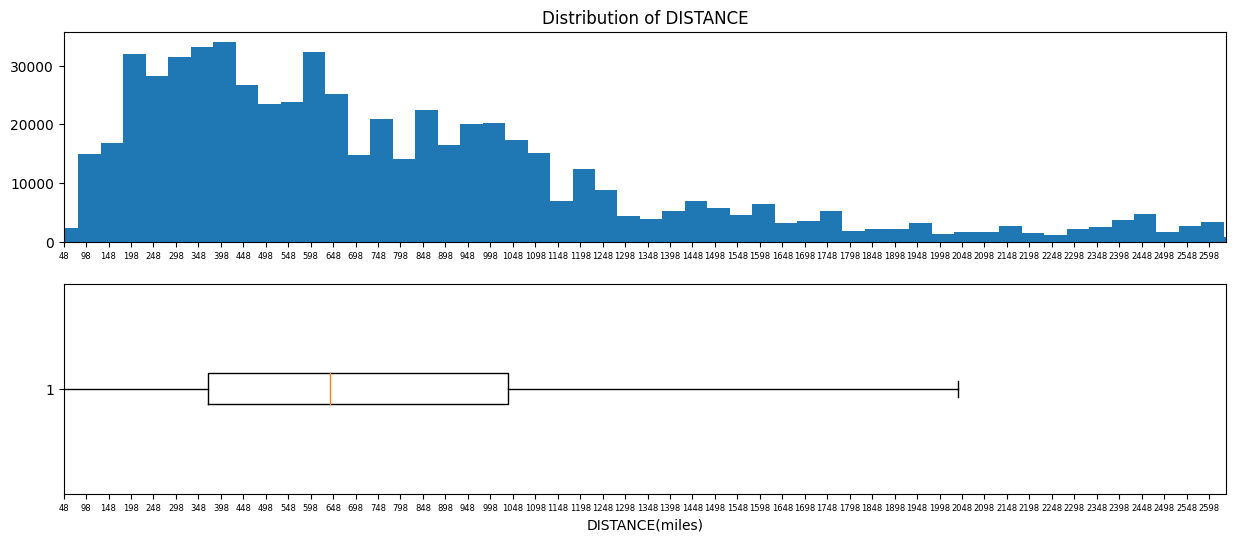

In [146]:
plot_distribution('DISTANCE',step=50)

> Most flights have distance between 300 miles and 1800 miles. Like the distribtuions above, the distribution has a long right tail (outliers to the right). The maximum air time is 5095 miles.


### Flight Departure Time

#### **DEP_HOUR** : Actual Departure Time
#### **DEP_TIME_AM** : Departure Time Indicator, AM or PM

In [147]:
#Create 2 bar plots of categorical variable
def plot_barplot(col1, col2):
    #Filter NA values
    filtered_data = flights[~pd.isna(flights[col1])]
    
    plt.figure(figsize=(14,8))
    colors = sns.color_palette()[0]

    #First barplot
    plt.subplot(2,1,1)
    sns.countplot(x=filtered_data[col1], color=colors)
    plt.title('Flights by '+col1)
    
    #Second barplot
    plt.subplot(2,1,2);
    sns.countplot(x=filtered_data[col2], color=colors);

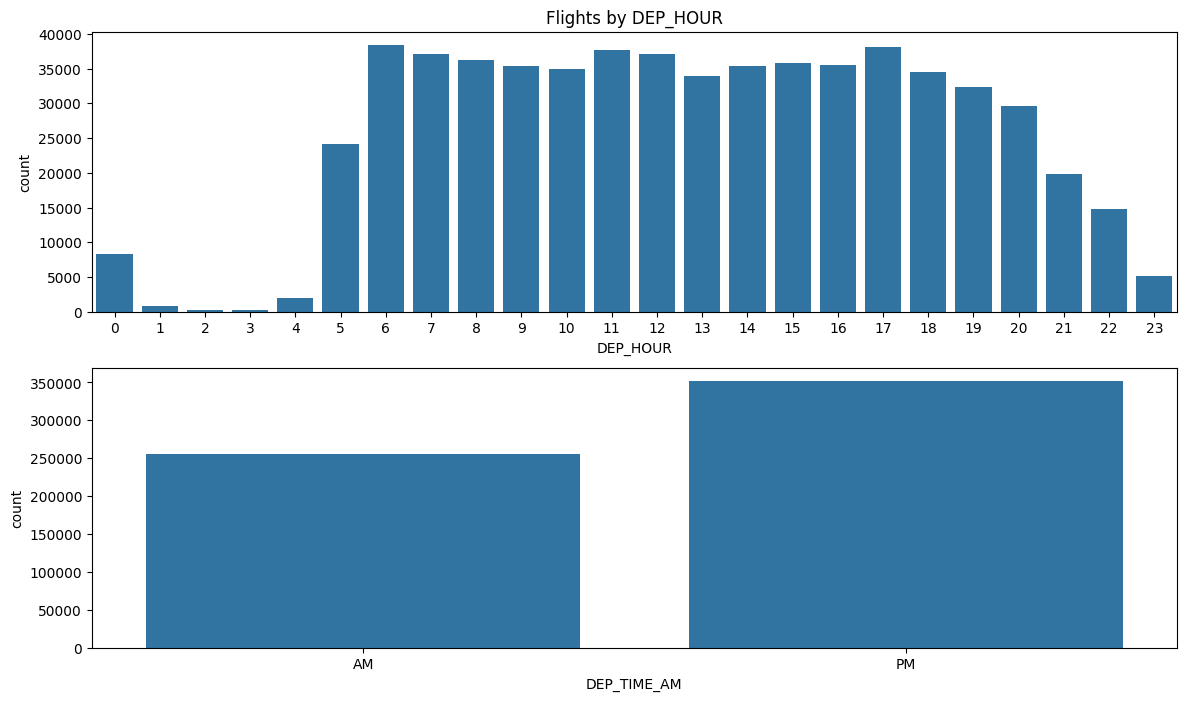

In [148]:
plot_barplot('DEP_HOUR', 'DEP_TIME_AM')

> Most flights departed between 5AM and 11PM; the peak departure time is between at 6AM to 6PM. There are more flights that depart during the afternoon.   

### Flight Arrival Time

#### **ARR_HOUR** : Actual Arrival Time
#### **ARR_TIME_AM** : Arrival Time Indicator, AM or PM

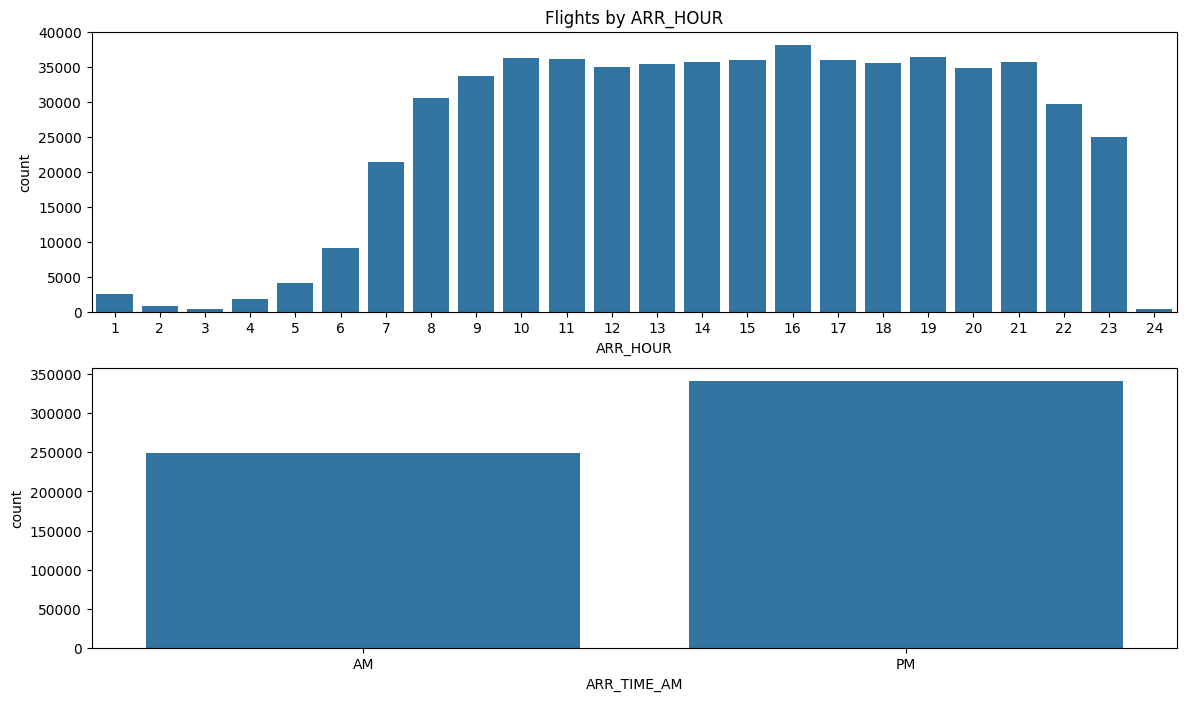

In [149]:
plot_barplot('ARR_HOUR', 'ARR_TIME_AM')

> Most flights arrived between 5AM and 11PM; the peak arrival time is between at 9AM to 11PM. There are more flights that arrive during the afternoon.

### Flight departure date

#### **DAY_OF_WEEK**: 
#### **WEEKDAY_WEEKEND** : Weeday or Weekend Indicator

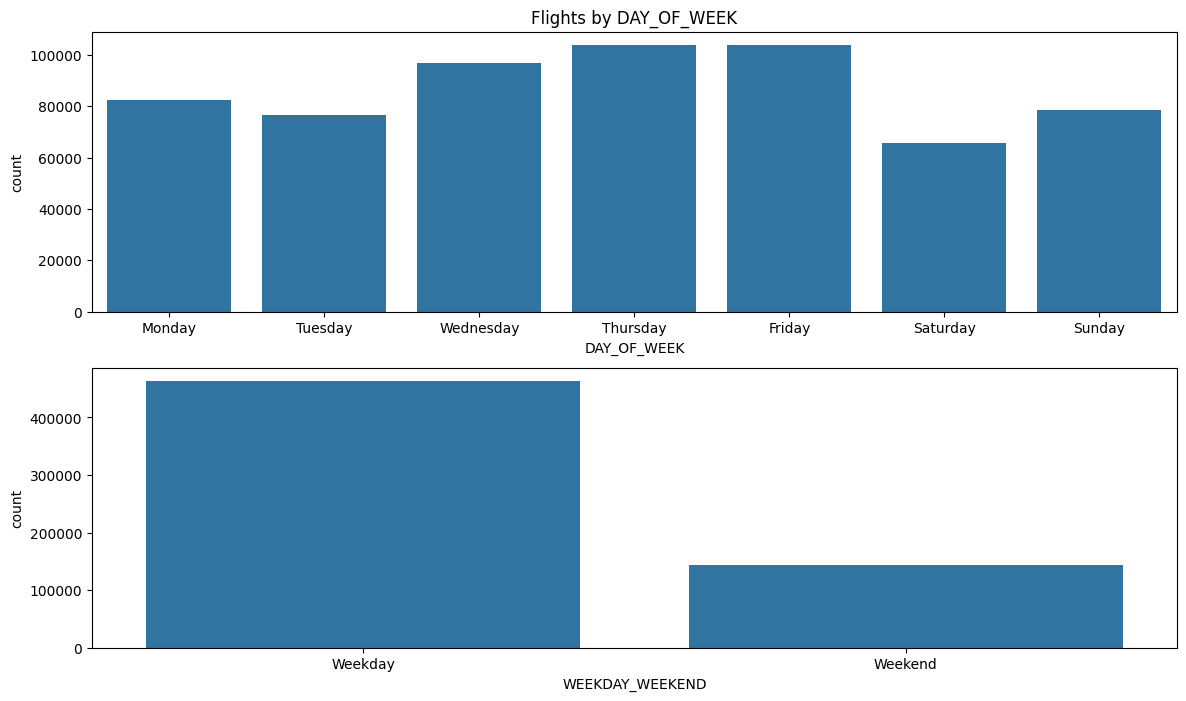

In [150]:
plot_barplot('DAY_OF_WEEK', 'WEEKDAY_WEEKEND')

> The days with the most number of flights are Thursday and Friday. There are more flights in the Weekday than the Weekend (Saturday has the least number of flights). 

### Flight Origin Airport, City, State

#### ORIGIN

In [151]:
def nlargest(col, n=20):
    plt.figure(figsize=[10,8])
    flights[col].value_counts().nlargest(n).sort_values().plot(kind='barh')
    plt.title('Flight Count by '+col+' (top '+str(n)+')')

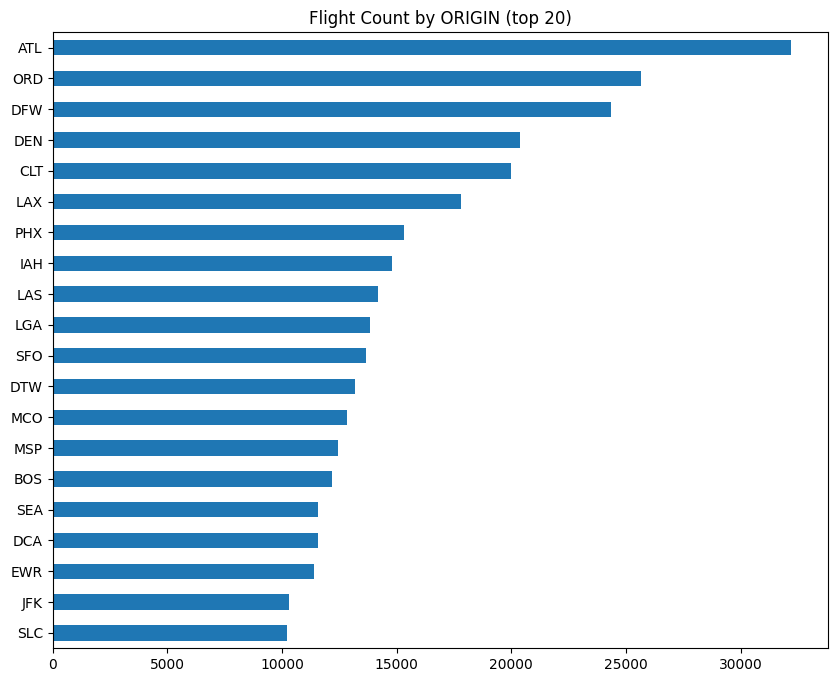

In [152]:
nlargest('ORIGIN')

> The origin airports with the most number of flights are ATL, ORD, DFW, DEN, CLT, LAX, PHX (in that order). 

### ORIGIN_CITY_NAME

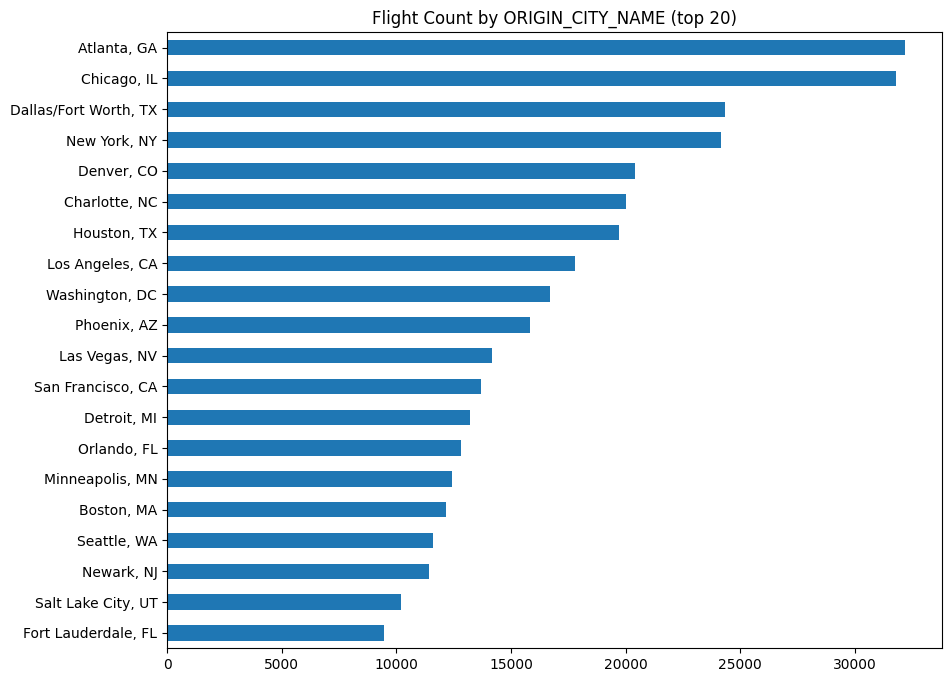

In [153]:
nlargest('ORIGIN_CITY_NAME')

> The origin cities with the most number of flights air Atlanta, Chicago, Dallas/Fort Worth, New York, Denver(in that order). These are the cities of the origin airport. 

### ORIGIN_STATE_NAME 

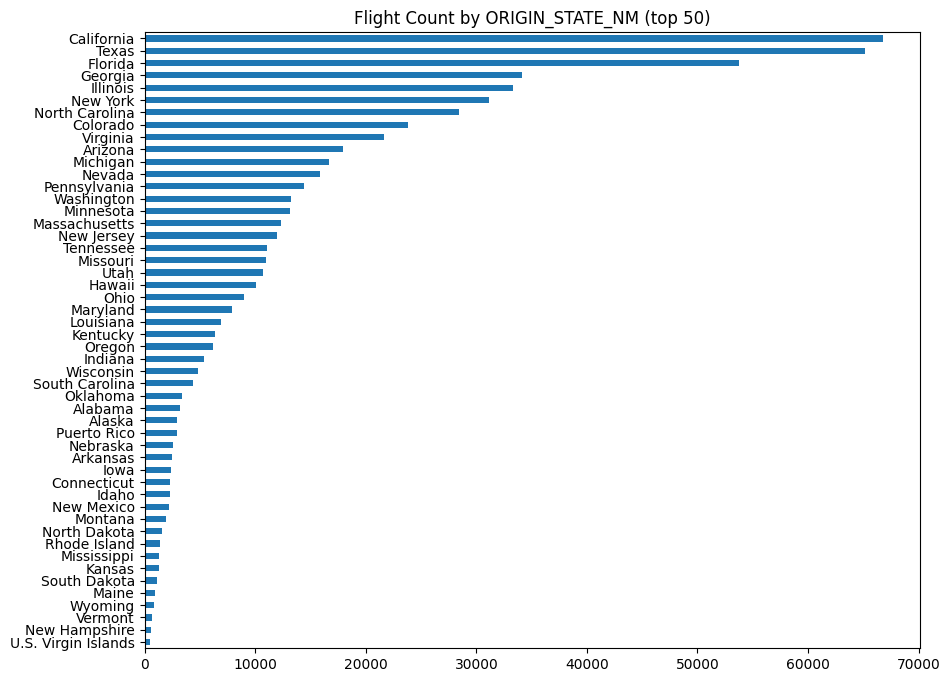

In [154]:
nlargest('ORIGIN_STATE_NM',50)

> The origin states with the most number of flights are Calinfornia, Texas, Florida, Georgia. Illinois (in that order). This order is not necessarily the states with the top origin airports because there are multiple airports in a state. 

### Flight Carrier

#### Description

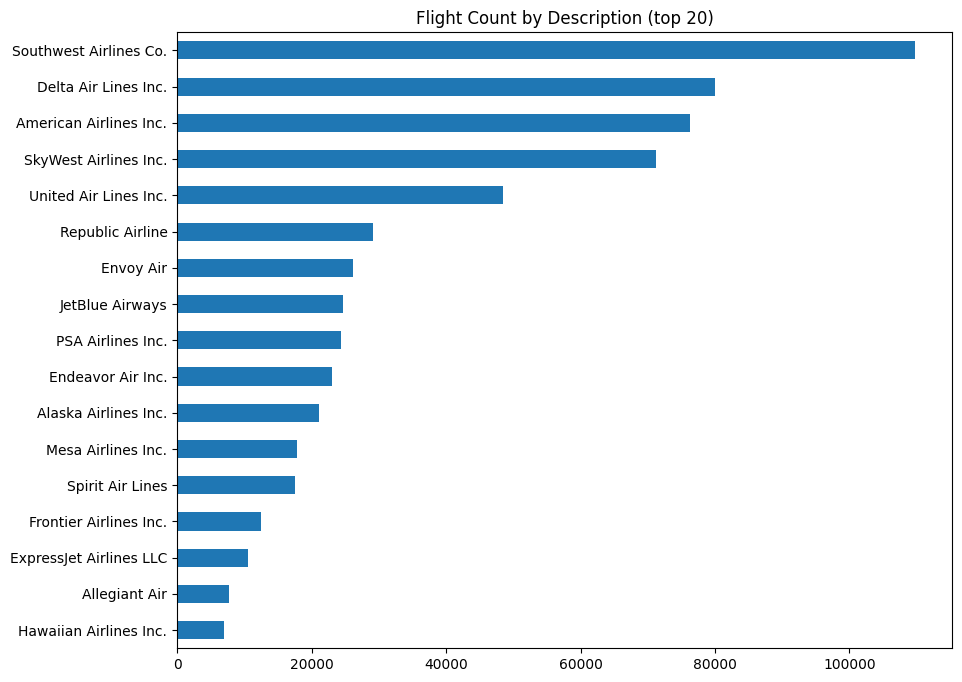

In [155]:
nlargest('Description')

> The carriers with the most number of flights are Soutwest Airlines, Delta Air Lines, American Airlines, SkyWest Airlines, United Airlines, Republic Airline (in that order);

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> Distribution of departure and arrival delays were similar and about 14% of all planes were delayed over 15 minutes. Also, departure and arrival times were mostly within 30 minutes of the scheduled time, but there were also a lot of outliers - planes delayed over 60 minutes (maximum delay was 2489 minutes). The highest count of planes was during 6AM, 11AM, 12PM, and 5PM and on Thursdays and Fridays. The highest number of flights occured in CA, ATL, and Soutwest Airlines. 

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Departure and arrival delay distributions were skewed to the right; most of the planes were centered around the mean, but the distribtuion had a long right tail as there were a number of planes that were delayed over 60 minutes. To look at the count of flights by the time of day, I had to create a new column _DEP_HOUR_ from the _DEP_TIME_ column which was in the format(hhmm) by extracting only the hour. 

## Bivariate Exploration

> In this section, the relationships between pairs of variables are investigated. The variables used in this section have been covered in the previouos section (univariate exploration). 

In [156]:
flights.dtypes

YEAR                         int64
MONTH                        int64
DAY_OF_MONTH                object
DAY_OF_WEEK               category
FL_DATE             datetime64[ns]
ORIGIN                      object
ORIGIN_CITY_NAME            object
ORIGIN_STATE_NM             object
DEST                        object
DEST_CITY_NAME              object
DEST_STATE_NM               object
DEP_TIME                     Int64
DEP_DELAY                    Int64
DEP_DEL15                   object
ARR_TIME                     Int64
ARR_DELAY                    Int64
ARR_DEL15                   object
CANCELLED                   object
AIR_TIME                     Int64
DISTANCE                   float64
Code                        object
Description                 object
DEP_HOUR                     Int64
ARR_HOUR                     Int64
DEP_TIME_AM               category
ARR_TIME_AM               category
WEEKDAY_WEEKEND           category
dtype: object

### What is the relationship between departure delay, arrival delay, air time, and distance? 

ValueError: RGBA sequence should have length 3 or 4

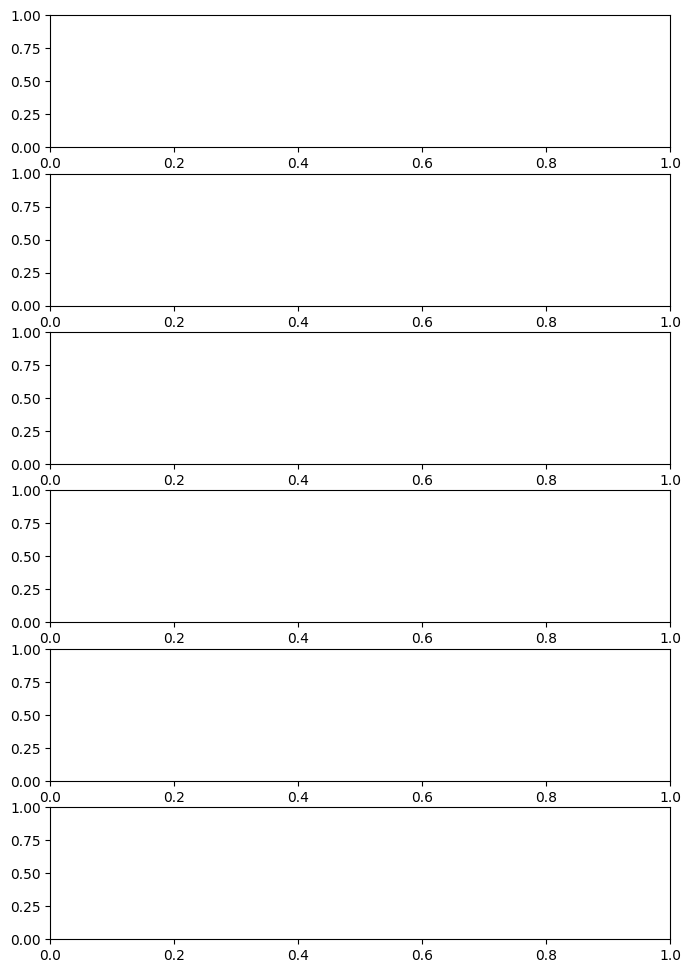

In [175]:
cols = ['DAY_OF_WEEK','WEEKDAY_WEEKEND','DEP_HOUR','DEP_TIME_AM','ARR_HOUR','ARR_TIME_AM']
colors = sns.color_palette("husl", 8)
f, axs = plt.subplots(len(cols), 1, figsize=(8,12))
for ax, col in zip(axs, cols):
    filtered_data = flights[~pd.isna(flights[col])]
    sns.countplot(x=filtered_data[col], hue=filtered_data['DEP_DEL15'], color=colors, ax=ax)
f.tight_layout()

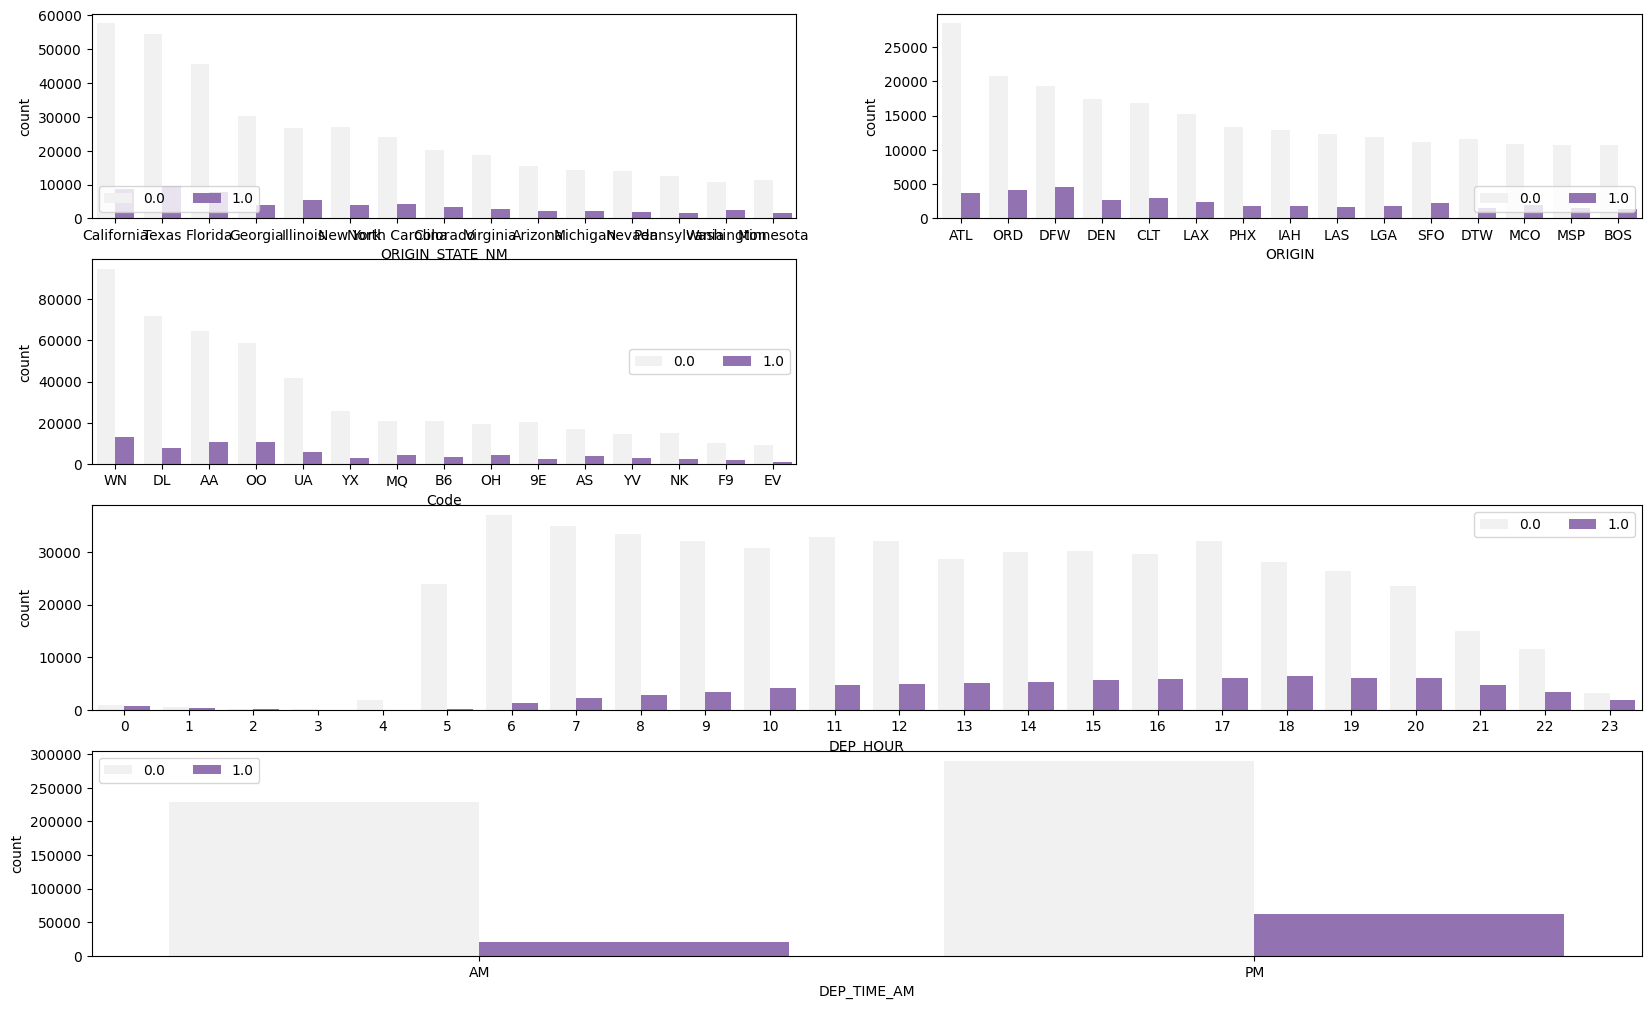

In [158]:
plt.figure(figsize = [20, 25])
base_color = sns.color_palette()[4]

# subplot 1: day_of_week vs. dep_del15
plt.subplot(8, 1, 1)
sns.countplot(x = flights['DAY_OF_WEEK'], hue = flights['DEP_DEL15'], color = base_color)

# subplot 2 dep_hour vs. dep_del15
ax = plt.subplot(8, 1, 2)
sns.countplot(data = flights, x = 'WEEKDAY_WEEKEND',  hue = 'DEP_DEL15', color = base_color)
ax.legend(ncol = 2)

# subplot 3 dep_hour vs. dep_del15
ax = plt.subplot(8, 1, 3)
sns.countplot(data = flights, x = 'DEP_HOUR',  hue = 'DEP_DEL15',
            color = base_color)
ax.legend(loc = 1, ncol = 2)

# subplot 4 dep_time_am vs. dep_del15
ax = plt.subplot(8, 1, 4)
sns.countplot(data = flights, x = 'DEP_TIME_AM',  hue = 'DEP_DEL15',
             order = ['AM', 'PM'],
            color = base_color)
ax.legend(loc = 2, ncol = 2)
          
# subplot 5: origin state vs. dep_del15
ax = plt.subplot(8, 2, 1)
origin_state = flights.ORIGIN_STATE_NM.value_counts().nlargest(15)
sns.countplot(data = flights, x = 'ORIGIN_STATE_NM',  hue = 'DEP_DEL15',
             order = origin_state.index, color = base_color)
ax.legend(loc = 3, ncol = 2)

# subplot 6: origin city vs. dep_del15
ax = plt.subplot(8, 2, 2)
origin = flights.ORIGIN.value_counts().nlargest(15)
sns.countplot(data = flights, x = 'ORIGIN',  hue = 'DEP_DEL15', order = origin.index, color = base_color)
ax.legend(loc = 4, ncol = 2)

# subplot 7: carrier vs. dep_del15
ax = plt.subplot(8, 2, 3)
carrier = flights.Code.value_counts().nlargest(15)
sns.countplot(data = flights, x = 'Code',  hue = 'DEP_DEL15', order = carrier.index, color = base_color)
ax.legend(loc = 5, ncol = 2)

plt.show()

In [159]:
flights.columns

Index(['YEAR', 'MONTH', 'DAY_OF_MONTH', 'DAY_OF_WEEK', 'FL_DATE', 'ORIGIN',
       'ORIGIN_CITY_NAME', 'ORIGIN_STATE_NM', 'DEST', 'DEST_CITY_NAME',
       'DEST_STATE_NM', 'DEP_TIME', 'DEP_DELAY', 'DEP_DEL15', 'ARR_TIME',
       'ARR_DELAY', 'ARR_DEL15', 'CANCELLED', 'AIR_TIME', 'DISTANCE', 'Code',
       'Description', 'DEP_HOUR', 'ARR_HOUR', 'DEP_TIME_AM', 'ARR_TIME_AM',
       'WEEKDAY_WEEKEND'],
      dtype='object')

In [160]:
num_vars = ['DEP_DELAY', 'ARR_DELAY', 'AIR_TIME', 'DISTANCE']

In [161]:
plt.figure(figsize = [10, 8])
sb.heatmap(flights[num_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.show()

NameError: name 'sb' is not defined

<Figure size 1000x800 with 0 Axes>

In [ ]:
samples = np.random.choice(flights.shape[0], 500, replace = False)
flights_samp = flights.loc[samples,:]

g = sb.PairGrid(data = flights_samp, vars = num_vars)
g = g.map_diag(plt.hist, bins = 20);
g.map_offdiag(plt.scatter);

Of the numerical variables _DEP_DELAY, ARR_DELAY, AIR_TIME, DISTANCE_, only _DEP_DELAY_ and _ARR_DELAY_ and _AIR_TIME_ and _DISTANCE_ are correlated. _AIR_TIME_ and _DISTANCE_ are not correlated with _DEP_DELAY_ and _ARR_DELAY_.

###  What is the relationship between categorical variables and departure delay  (>15 min)?

> The highest proportion of departure delayed flights occurred on Friday, 6PM, Texas, DFW airport, WN(Soutwest Airlines). 

### What is the relationship between categorical variables and arrival delay  (>15 min)?

In [ ]:
plt.figure(figsize = [20, 25])
base_color = sns.color_palette()[1]

# subplot 1: day_of_week vs. arr_del15
plt.subplot(5, 1, 1)
sns.countplot(data = flights, x = 'DAY_OF_WEEK', hue = 'ARR_DEL15',
             order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday', 'Sunday'], color = base_color)

# subplot 2: dep_hour vs. arr_del15
ax = plt.subplot(5, 1, 2)
sns.countplot(data = flights, x = 'DEP_HOUR',  hue = 'ARR_DEL15',
             order = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', 
                    '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24'],
            color = base_color)
ax.legend(ncol = 2) # re-arrange legend to reduce overlapping

# subplot 3: origin state vs. arr_del15
ax = plt.subplot(5, 1, 3)
origin_state = flights.ORIGIN_STATE_NM.value_counts().nlargest(15)
sns.countplot(data = flights, x = 'ORIGIN_STATE_NM',  hue = 'ARR_DEL15',
             order = origin_state.index, color = base_color)
ax.legend(loc = 1, ncol = 2) # re-arrange legend to remove overlapping

# subplot 4: origin city vs. arr_del15
ax = plt.subplot(5, 1, 4)
origin = flights.ORIGIN.value_counts().nlargest(15)
sns.countplot(data = flights, x = 'ORIGIN',  hue = 'ARR_DEL15', order = origin.index, color = base_color)
ax.legend(loc = 2, ncol = 2) # re-arrange legend to remove overlapping

# subplot 5: carrier vs. arr_del15
ax = plt.subplot(5, 1, 5)
carrier = flights.Code.value_counts().nlargest(15)
sns.countplot(data = flights, x = 'Code',  hue = 'ARR_DEL15', order = carrier.index, color = base_color)
ax.legend(loc = 3, ncol = 2) # re-arrange legend to remove overlapping

plt.show()

> The relationship between whether the arrival of the flight was delayed or not follows the same pattern as departure delayed. 

### What is the relationship between categorical variables and cancelled?

In [ ]:
plt.figure(figsize = [20, 25])
base_color = sb.color_palette()[5]

# subplot 1: day_of_week vs. cancelled
plt.subplot(5, 1, 1)
sb.countplot(data = flights, x = 'DAY_OF_WEEK', hue = 'CANCELLED',
             order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday', 'Sunday'], color = base_color)

# subplot 2: dep_hour vs. cancelled
ax = plt.subplot(5, 1, 2)
sb.countplot(data = flights, x = 'DEP_HOUR',  hue = 'CANCELLED',
             order = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', 
                    '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24'],
            color = base_color)
ax.legend(ncol = 2) # re-arrange legend to reduce overlapping

# subplot 3: origin state vs. cancelled
ax = plt.subplot(5, 1, 3)
origin_state = flights.ORIGIN_STATE_NM.value_counts().nlargest(15)
sb.countplot(data = flights, x = 'ORIGIN_STATE_NM',  hue = 'CANCELLED',
             order = origin_state.index, color = base_color)
ax.legend(loc = 1, ncol = 2) # re-arrange legend to remove overlapping

# subplot 4: origin city vs. cancelled
ax = plt.subplot(5, 1, 4)
origin = flights.ORIGIN.value_counts().nlargest(15)
sb.countplot(data = flights, x = 'ORIGIN',  hue = 'CANCELLED', order = origin.index, color = base_color)
ax.legend(loc = 2, ncol = 2) # re-arrange legend to remove overlapping

# subplot 5: carrier vs. cancelled
ax = plt.subplot(5, 1, 5)
carrier = flights.Code.value_counts().nlargest(15)
sb.countplot(data = flights, x = 'Code',  hue = 'CANCELLED', order = carrier.index, color = base_color)
ax.legend(loc = 3, ncol = 2) # re-arrange legend to remove overlapping

plt.show()

> The highest proportion of cancelled flights occurred on Friday, Illinois, ORD airport, WN(Soutwest Airlines). 

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Departure delayed, arrival delayed, and cancelled flights occurred during similar time and locations. They occurred highly on Friday, 6PM, Illinois/ Texas, ORD/DFW airport, WN(Soutwest Airlines). These observations are not too suprising because those were the location and time when the number of flights were high. 

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> There was a strong positive correlation between arrival delay and departure delay and between air time and distance. These correlations are not suprising as delay would lead to delay and planes would fly longer when the distance of the flight is longer. 

## Multivariate Exploration

> In the final section, the relationship between multiple variables are investigated. Here, the relationship between categorical variables and departure delay or arrival delay are observed.

### What is the relationship between time of day, time of week, and departure delay?

In [ ]:
plt.figure(figsize = [7, 5])

cat_means = flights.groupby(['WEEKDAY_WEEKEND', 'DEP_TIME_AM']).mean()['DEP_DELAY']
cat_means = cat_means.reset_index(name = 'DEP_DELAY_avg')
cat_means = cat_means.pivot(index = 'DEP_TIME_AM', columns = 'WEEKDAY_WEEKEND',
                            values = 'DEP_DELAY_avg')
sb.heatmap(cat_means, annot = True, fmt = '.3f',
           cbar_kws = {'label' : 'mean(DEP_DELAY)'});

In [ ]:
plt.figure(figsize = [8, 6])
ax = sb.barplot(data = flights, x = 'WEEKDAY_WEEKEND', y = 'DEP_DELAY', hue = 'DEP_TIME_AM')
ax.legend(loc = 8, ncol = 3, framealpha = 1, title = 'DEP_TIME_AM/PM');

> The average departure delay is the longest during weekend afternoon, followed by weekday afternoon, weekend before noon, and weekday before noon.

### What is the relationship between time of day, time of week, and arrival delay?

In [ ]:
plt.figure(figsize = [7, 5])

cat_means = flights.groupby(['WEEKDAY_WEEKEND', 'DEP_TIME_AM']).mean()['ARR_DELAY']
cat_means = cat_means.reset_index(name = 'ARR_DELAY_avg')
cat_means = cat_means.pivot(index = 'DEP_TIME_AM', columns = 'WEEKDAY_WEEKEND',
                            values = 'ARR_DELAY_avg')
sb.heatmap(cat_means, annot = True, fmt = '.3f',
           cbar_kws = {'label' : 'mean(ARR_DELAY)'});

In [ ]:
plt.figure(figsize = [1, 8])
ax = sb.barplot(data = flights, x = 'WEEKDAY_WEEKEND', y = 'ARR_DELAY', hue = 'DEP_TIME_AM')
ax.legend(loc = 8, ncol = 3, framealpha = 1, title = 'DEP_TIME_AM/PM');

> The average arrival delay is the longest during weekend afternoon. There is no delay in arrival time during weekday afternoon, weekend before noon, and weeday before noon; arrival is earliest during weekday before noon, followed by weekend before noon and weekend afternoon. 

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> In this section, I plotted the relationship between the time of day, the time of week, and departure and arrival delay. I used the binary variable of the time of day (AM/PM), the binary variable of time of weeday (weekday/weekend), and delay time. From above we 


### Were there any interesting or surprising interactions between features?

> The trend of longest to shortest delay was the same for arrival and departure delay (weekend afternoon, weekday afternoon, weekend before noon, and weekday before noon). However, while on average there was a departure delay for all four categories, there was a arrival delay only during weekend afternoon. During weekday afternoon, weekend before noon, and weekday before noon, flights arrived earlier than the scheduled time. This may be because airlines mark their flight schedules by a wide margin.  

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!